# Employee Attrition Prediction

**Problem Statement**
- Need to predict Employee Attrition bassed on given features
- Features impacting for employee Attrition.

## Load requried Libraries

In [1071]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [880]:
import warnings
warnings.filterwarnings('ignore')

### Import Datasets

In [881]:
df= pd.read_csv('employee_attrition.csv')

In [882]:
pd.set_option('display.max_columns',None)

### Getting into Dataset

In [883]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
672,42,No,Travel_Rarely,462,Sales,14,2,Medical,1,936,3,Female,68,2,2,Sales Executive,3,Single,6244,7824,7,Y,No,17,3,1,80,0,10,6,3,5,4,0,3
934,25,No,Travel_Rarely,266,Research & Development,1,3,Medical,1,1303,4,Female,40,3,1,Research Scientist,2,Single,2096,18830,1,Y,No,18,3,4,80,0,2,3,2,2,2,2,1
277,38,No,Travel_Rarely,322,Sales,7,2,Medical,1,382,1,Female,44,4,2,Sales Executive,1,Divorced,5605,19191,1,Y,Yes,24,4,3,80,1,8,3,3,8,0,7,7
1454,45,No,Travel_Rarely,374,Sales,20,3,Life Sciences,1,2046,4,Female,50,3,2,Sales Executive,3,Single,4850,23333,8,Y,No,15,3,3,80,0,8,3,3,5,3,0,1
1388,32,No,Non-Travel,1146,Research & Development,15,4,Medical,1,1955,3,Female,34,3,2,Healthcare Representative,4,Divorced,6667,16542,5,Y,No,18,3,2,80,1,9,6,3,5,1,1,2


- Attrition column is dependent variable

In [884]:
# Check unique values in dependent feaature
df.Attrition.unique()

array(['Yes', 'No'], dtype=object)

- 2 unique values, means its a Binary classificatoin Problem

In [885]:
# Converting Target varibae to numeric type
df['target']= np.where(df.Attrition=='Yes',1,0)

In [886]:
df= df.drop('Attrition',axis=1)

In [887]:
df.shape

(1470, 35)

In [888]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

- No null values
- there are categorical & Numerical features

In [889]:
def Describe(df):
    describe = df.describe(percentiles=[0.01,0.99])
    describe = describe.append(df.nunique().rename('unique')) # .rename used to provide name to a series
    return describe
describe(df)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,target,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1%,19.000000,117.000000,1.000000,1.000000,1.0,19.690000,1.000000,30.000000,1.000000,1.000000,1.000000,1382.460000,2325.070000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99%,58.310000,1485.000000,29.000000,5.000000,1.0,2046.620000,4.000000,100.000000,4.000000,5.000000,4.000000,19626.310000,26704.240000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,35.000000,6.000000,4.000000,31.000000,15.000000,14.000000,14.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unique,43.000000,886.000000,29.000000,5.000000,1.0,1470.000000,4.000000,71.000000,4.000000,5.000000,4.000000,1349.000000,1427.000000,10.000000,15.000000,2.000000,4.000000,1.0,4.000000,40.000000,7.000000,4.000000,37.000000,19.000000,16.000000,18.000000,2.000000,3.0,3.0,6.0,2.0,9.0,3.0,1.0,2.0


- EmployeeCount, StandardHours have only 1 unique value
- many numerical features have unique values less then 10, need to consider them as descrete features
- employeenumber feature has all unique values, we will treat it as unique ID for each employee
- Most Features have normal distribution as mean & Median are nearby.
- Max values are beyond 99%, we will consider till 99% to avoid Outliers.

### defining Index variable from given features

In [890]:
df = df.set_index('EmployeeNumber')
df.index.names = ['Emp.ID']
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,target
Emp.ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
2,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
4,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
5,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
7,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0


### Defining Target & independent variables

In [891]:
X = df.drop('target', axis=1)
y = df.target

### analyse Target Variable

In [892]:
y.describe()

count    1470.000000
mean        0.161224
std         0.367863
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: target, dtype: float64

In [893]:
y.value_counts()

0    1233
1     237
Name: target, dtype: int64

In [894]:
# check if target variable is imbalance
('Imbalance',y.mean()) if y.mean() not in range(40,60) else ('Balanced',y.mean())

('Imbalance', 0.16122448979591836)

> - In such type of problems its expected to have imbalaced target feature, we will work on it later

### Split Features in Numeric & categorical features

In [895]:
num = X.select_dtypes(include='number')
cat = X.select_dtypes(include='object')

In [896]:
num.sample(5)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Emp.ID,,,,,,,,,,,,,,,,,,,,,,,,,
321,59,818,6,2,1,2,52,3,1,3,2267,25657,8,17,3,4,80,0,7,2,2,2,2,2,2
1997,38,508,6,4,1,1,72,2,2,3,5321,14284,2,11,3,4,80,1,10,1,3,8,3,7,7
644,50,1246,3,3,1,1,99,3,5,2,18200,7999,1,11,3,3,80,1,32,2,3,32,5,10,7
175,31,542,20,3,1,2,71,1,2,3,4559,24788,3,11,3,3,80,1,4,2,3,2,2,2,2
1787,37,589,9,2,1,2,46,2,2,2,4189,8800,1,14,3,1,80,2,5,2,3,5,2,0,3


In [897]:
num.shape

(1470, 25)

In [898]:
cat.sample(5)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
Emp.ID,,,,,,,,
1487,Travel_Frequently,Sales,Technical Degree,Female,Sales Executive,Single,Y,No
1786,Travel_Rarely,Research & Development,Technical Degree,Female,Manager,Married,Y,No
1115,Non-Travel,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
197,Travel_Rarely,Research & Development,Technical Degree,Female,Research Scientist,Divorced,Y,No
242,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Single,Y,No


In [899]:
cat.shape

(1470, 8)

### Feature Selection
#### Part 1. Remove feature with 0 variance

In [900]:
from sklearn.feature_selection import VarianceThreshold

In [901]:
var_sel = VarianceThreshold(threshold=0)
var_sel.fit_transform(num)
cols = var_sel.get_support(indices=False)
num1 = num.iloc[:,cols]
num1.shape

(1470, 23)

In [902]:
num.shape #--- 2 Features with 0 Varaince dropped by VarianceThreshold

(1470, 25)

### Identify discrete features from numerical features

In [903]:
descrete_cols = [col for col in num1.columns if num[col].nunique()<=10]

In [904]:
descrete = num1[descrete_cols]
descrete.shape

(1470, 11)

In [905]:
# joining descrete & catagorical
cat_with_descrete = pd.concat((cat,descrete),axis=1)

In [906]:
cat_with_descrete.shape

(1470, 19)

In [907]:
# remaining Numerical features
num1 = num1.drop(descrete_cols,axis=1)

In [908]:
num1.shape

(1470, 12)

### Outlier removal by considering only 1 to 99 percetile values

In [909]:
def outlier_remove(x):
    x = x.clip(lower=x.quantile(0.01))
    x = x.clip(upper=x.quantile(0.99))
    return x

In [910]:
num_wo_outlier = num1.apply(lambda x: outlier_remove(x))

In [911]:
Describe(num_wo_outlier)

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.918810,802.482993,9.192517,65.891156,6503.407177,14312.602483,15.209524,11.268707,6.980272,4.214966,2.178912,4.102721
std,9.099146,403.260237,8.106864,20.329428,4700.530849,7112.052810,3.659938,7.710507,6.004901,3.576459,3.188426,3.503717
min,19.000000,117.000000,1.000000,30.000000,1382.460000,2325.070000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1%,19.000000,117.000000,1.000000,30.000000,1389.732600,2325.711700,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,14.000000,10.000000,5.000000,3.000000,1.000000,3.000000
99%,58.096100,1485.000000,29.000000,100.000000,19626.096100,26703.384400,25.000000,35.000000,31.000000,15.000000,14.000000,14.000000
max,58.310000,1485.000000,29.000000,100.000000,19626.310000,26704.240000,25.000000,35.000000,31.000000,15.000000,14.000000,14.000000
unique,41.000000,869.000000,29.000000,71.000000,1321.000000,1400.000000,15.000000,35.000000,31.000000,16.000000,15.000000,15.000000


In [912]:
Describe(df[num1.columns])

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,15.209524,11.279592,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,3.659938,7.780782,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,19.000000,117.000000,1.000000,30.000000,1382.460000,2325.070000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,14.000000,10.000000,5.000000,3.000000,1.000000,3.000000
99%,58.310000,1485.000000,29.000000,100.000000,19626.310000,26704.240000,25.000000,35.000000,31.000000,15.000000,14.000000,14.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,25.000000,40.000000,40.000000,18.000000,15.000000,17.000000
unique,43.000000,886.000000,29.000000,71.000000,1349.000000,1427.000000,15.000000,40.000000,37.000000,19.000000,16.000000,18.000000


## Feature Selection
### Section-1 Numerical Variable
#### Part:2 - Bi-Variate Analysis (Feature Discretization)

In [914]:
from sklearn.preprocessing import KBinsDiscretizer

In [915]:
kbin = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [916]:
kbin.fit(num_wo_outlier)
num_bin = kbin.transform(num_wo_outlier)

In [917]:
num_binned = pd.DataFrame(num_bin, index=num_wo_outlier.index, columns=num_wo_outlier.columns).add_suffix('_Rank')
num_binned.head()

,Age_Rank,DailyRate_Rank,DistanceFromHome_Rank,HourlyRate_Rank,MonthlyIncome_Rank,MonthlyRate_Rank,PercentSalaryHike_Rank,TotalWorkingYears_Rank,YearsAtCompany_Rank,YearsInCurrentRole_Rank,YearsSinceLastPromotion_Rank,YearsWithCurrManager_Rank
Emp.ID,,,,,,,,,,,,
1,7.0,7.0,0.0,9.0,6.0,7.0,0.0,4.0,4.0,4.0,0.0,4.0
2,8.0,1.0,4.0,4.0,5.0,9.0,7.0,5.0,7.0,5.0,1.0,5.0
4,5.0,9.0,1.0,8.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0
5,3.0,9.0,2.0,3.0,2.0,8.0,0.0,4.0,5.0,5.0,2.0,0.0
7,1.0,3.0,1.0,1.0,3.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0


In [918]:
y.mean()

0.16122448979591836

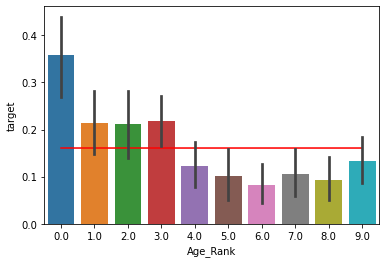

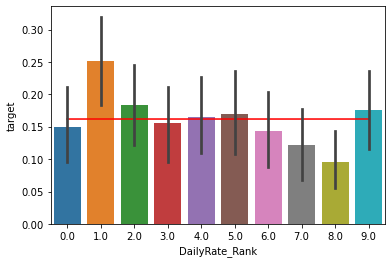

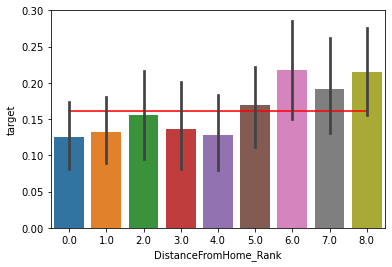

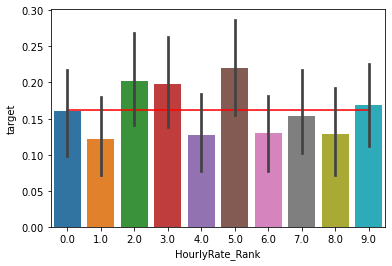

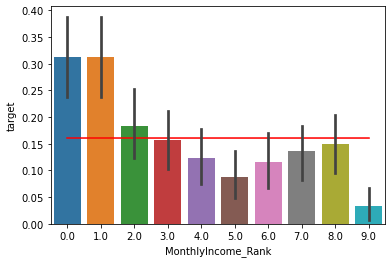

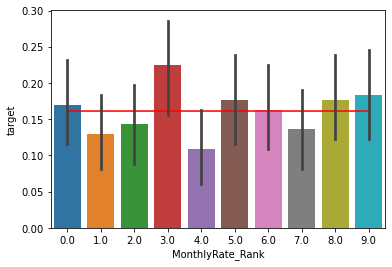

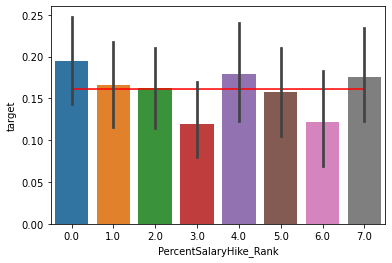

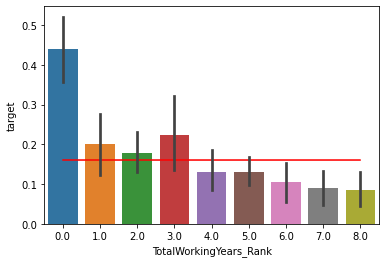

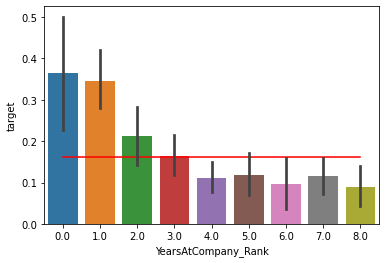

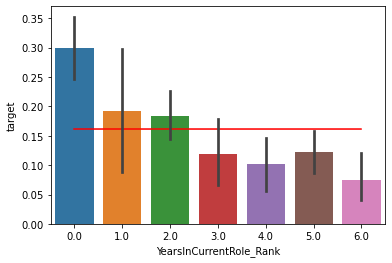

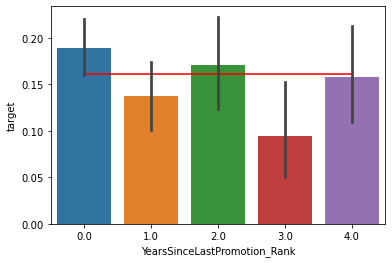

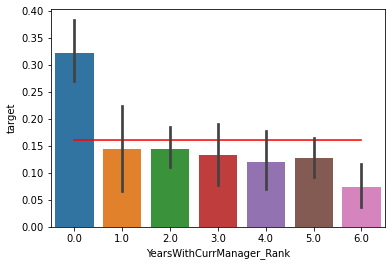

In [919]:
# Need to check if features shows some slope with respect to target variable
# check if some deciles are below & above the populaiton average target, if this is available then slope willsns be strong
# Conclusion - A strong slope is indicator of features's ability to discriminate the event from non event.
# This make particluar Feature a Good Predictor

for col in num_binned.columns:
    sns.lineplot(x=num_binned[col], y=y.mean(), color='red')
    sns.barplot(x=num_binned[col], y=y)
    plt.show()

- we can observe, Age, DistanceFromHome, MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole. YeasWithCurrManager have some slope with respect to target mean
- we will consider only these features.

In [920]:
num_var = num_wo_outlier[['Age', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 
                         'YearsInCurrentRole', 'YearsWithCurrManager']]

### Part-3   Select K Best

In [921]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=4)
selector.fit(num_var,y)
num_kbest = num_var.iloc[:,selector.get_support()]
num_kbest.head()

,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole
Emp.ID,,,,
1,5993.0,8,6,4
2,5130.0,10,10,7
4,2090.0,7,0,0
5,2909.0,8,8,7
7,3468.0,6,2,2


- 4 Features on which target feature is most dependent are identified.

### Section-2 Catagorical Variable
#### Part-2 Bi-Variate Analysis (Feature Discretization)

In [922]:
# Consider features having more then 1 unique Values only
cat2 = cat_with_descrete.loc[:,cat_with_descrete.nunique()>1]
cat2.nunique()

BusinessTravel               3
Department                   3
EducationField               6
Gender                       2
JobRole                      9
MaritalStatus                3
OverTime                     2
Education                    5
EnvironmentSatisfaction      4
JobInvolvement               4
JobLevel                     5
JobSatisfaction              4
NumCompaniesWorked          10
PerformanceRating            2
RelationshipSatisfaction     4
StockOptionLevel             4
TrainingTimesLastYear        7
WorkLifeBalance              4
dtype: int64

In [923]:
cat2.shape

(1470, 18)

BusinessTravel


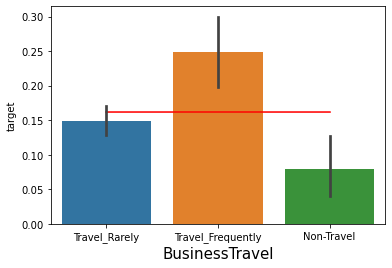

Department


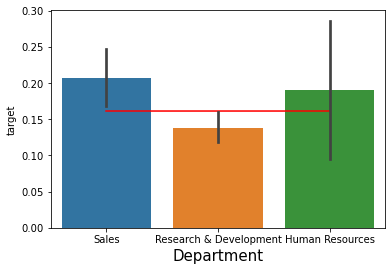

EducationField


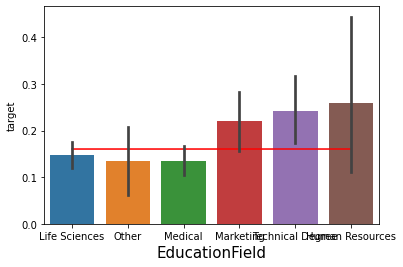

Gender


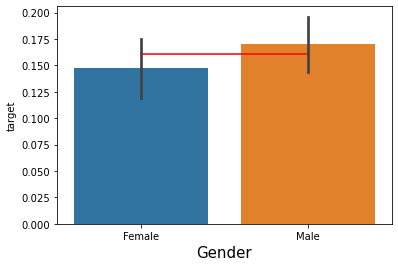

JobRole


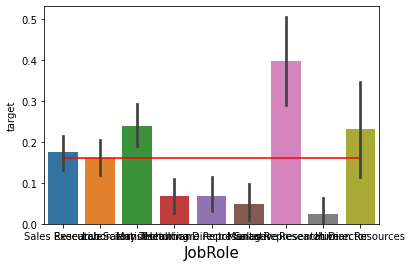

MaritalStatus


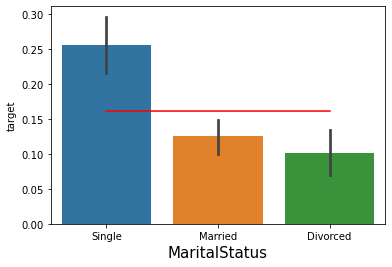

OverTime


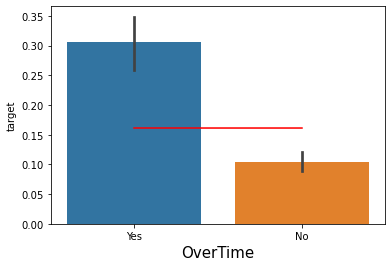

Education


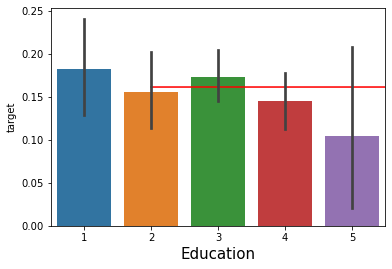

EnvironmentSatisfaction


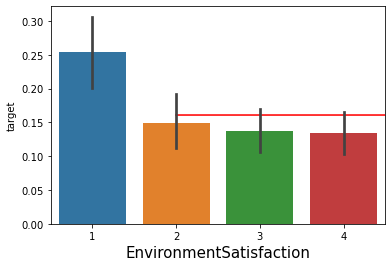

JobInvolvement


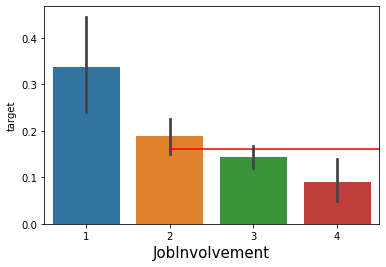

JobLevel


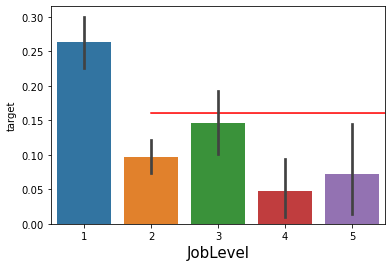

JobSatisfaction


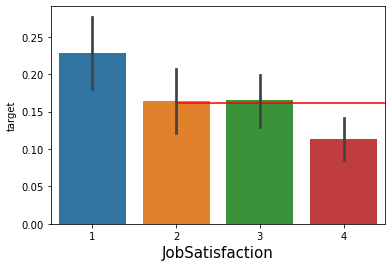

NumCompaniesWorked


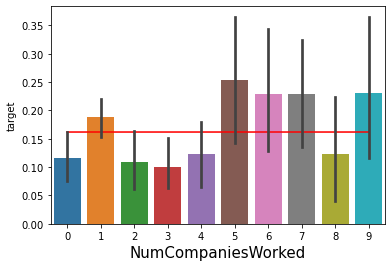

PerformanceRating


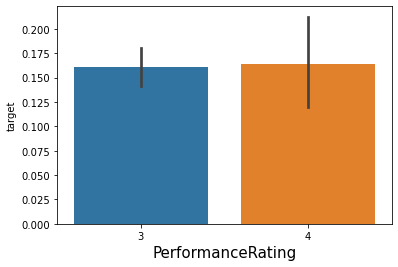

RelationshipSatisfaction


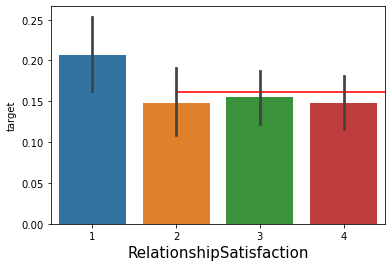

StockOptionLevel


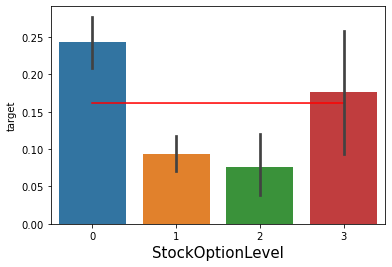

TrainingTimesLastYear


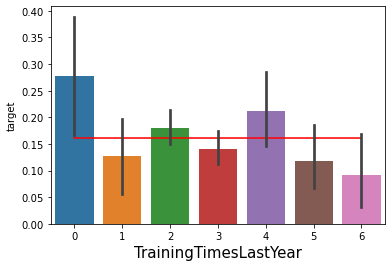

WorkLifeBalance


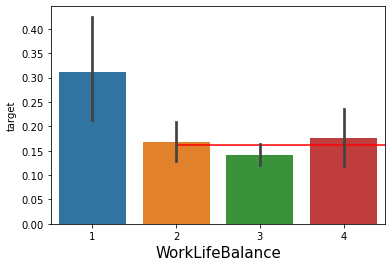

In [924]:
# Categorial Features do not need discretizer.
for col in cat2.columns:
    print(col)
    sns.lineplot(x=cat2[col], y=y.mean(), color='red')
    sns.barplot(x=cat2[col], y=y)
    plt.xlabel(col,fontsize=15)
    plt.show()

In [925]:
cat_var = cat2.drop(['Department', 'Gender', 'Education', 'EnvironmentSatisfaction', 'JobSatisfaction', 'PerformanceRating', 
 'RelationshipSatisfaction','TrainingTimesLastYear', 'WorkLifeBalance'],axis=1)
cat_var.head()

,BusinessTravel,EducationField,JobRole,MaritalStatus,OverTime,JobInvolvement,JobLevel,NumCompaniesWorked,StockOptionLevel
Emp.ID,,,,,,,,,
1,Travel_Rarely,Life Sciences,Sales Executive,Single,Yes,3,2,8,0
2,Travel_Frequently,Life Sciences,Research Scientist,Married,No,2,2,1,1
4,Travel_Rarely,Other,Laboratory Technician,Single,Yes,2,1,6,0
5,Travel_Frequently,Life Sciences,Research Scientist,Married,Yes,3,1,1,0
7,Travel_Rarely,Medical,Laboratory Technician,Married,No,3,1,9,1


In [926]:
# change dtypes to get dummy feature for all cat feature
# for col in cat_var.columns:

for col in cat_var.columns:
    cat_var[col]= cat_var[col].astype('object')
cat_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   BusinessTravel      1470 non-null   object
 1   EducationField      1470 non-null   object
 2   JobRole             1470 non-null   object
 3   MaritalStatus       1470 non-null   object
 4   OverTime            1470 non-null   object
 5   JobInvolvement      1470 non-null   object
 6   JobLevel            1470 non-null   object
 7   NumCompaniesWorked  1470 non-null   object
 8   StockOptionLevel    1470 non-null   object
dtypes: object(9)
memory usage: 154.8+ KB


In [927]:
# Create Dummy Features
char_dummies = pd.get_dummies(cat_var, drop_first=True)
char_dummies.shape

(1470, 37)

In [928]:
char_dummies.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,NumCompaniesWorked_1,NumCompaniesWorked_2,NumCompaniesWorked_3,NumCompaniesWorked_4,NumCompaniesWorked_5,NumCompaniesWorked_6,NumCompaniesWorked_7,NumCompaniesWorked_8,NumCompaniesWorked_9,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3
Emp.ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [929]:
int(char_dummies.shape[1]*0.75)
# char_dummies.shape[1]

27

### part-2 Select K Best

In [930]:
kbest = SelectKBest(chi2, k=int(char_dummies.shape[1]*0.75))  # Consider 75% of features with help of selectkbest
kbest.fit(char_dummies,y)
cols_char = kbest.get_support()
char_best = char_dummies.loc[:,cols_char]
char_best.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   BusinessTravel_Travel_Frequently  1470 non-null   uint8
 1   EducationField_Marketing          1470 non-null   uint8
 2   EducationField_Medical            1470 non-null   uint8
 3   EducationField_Technical Degree   1470 non-null   uint8
 4   JobRole_Laboratory Technician     1470 non-null   uint8
 5   JobRole_Manager                   1470 non-null   uint8
 6   JobRole_Manufacturing Director    1470 non-null   uint8
 7   JobRole_Research Director         1470 non-null   uint8
 8   JobRole_Sales Representative      1470 non-null   uint8
 9   MaritalStatus_Married             1470 non-null   uint8
 10  MaritalStatus_Single              1470 non-null   uint8
 11  OverTime_Yes                      1470 non-null   uint8
 12  JobInvolvement_2                  

### creating Master dataset for Model training

In [931]:
X_all = pd.concat([num_kbest,char_best], axis=1)
X_all.shape

(1470, 31)

### Model Preperation

#### Train Test split

In [934]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_all,y,train_size=0.8, random_state=2) # Random state selected t get even attrition rate accross train & val split

In [935]:
# Analyse split
print('Shape of X_train',X_train.shape)
print('Shape of X_val',X_val.shape)
print('Attrition rate in training split',y_train.mean())
print('Attrition rate in validation split',y_val.mean())

Shape of X_train (1176, 31)
Shape of X_val (294, 31)
Attrition rate in training split 0.16071428571428573
Attrition rate in validation split 0.16326530612244897


In [936]:
# Call models to evaluate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
dt = DecisionTreeClassifier(random_state=2)
rf = RandomForestClassifier(random_state=2)
gbm = GradientBoostingClassifier(random_state=2)

In [937]:
# model fit function
from sklearn.model_selection import GridSearchCV
def model_fit(est,param,x,y):
    g_search = GridSearchCV(est,param,n_jobs=-1, cv=5)
    g_search.fit(x,y)
    print('Best Parameter for-->',est,'\n', g_search.best_params_)

In [938]:
dt_params = {'max_depth':[3,4,5,6], 'criterion':['gini', 'entropy'], 'min_samples_split':[50,100]}
rf_params = {'criterion':['gini','entropy'], 'n_estimators':[50,100,150],'max_depth':[3,4,5,6],
             'min_samples_split':[50,100]}
gbm_params = {'criterion':['squared_error', 'mse'],'n_estimators':[50,100,150], 
              'max_depth':[3,4,5,6],'min_samples_split':[50,100], 'learning_rate':[0.05,0.1,]}

In [939]:
model_fit(dt,dt_params,X_train,y_train)
model_fit(rf,rf_params,X_train,y_train)
model_fit(gbm,gbm_params,X_train,y_train)

Best Parameter for--> DecisionTreeClassifier(random_state=2) 
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 50}
Best Parameter for--> RandomForestClassifier(random_state=2) 
 {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 50, 'n_estimators': 100}
Best Parameter for--> GradientBoostingClassifier(random_state=2) 
 {'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 100, 'n_estimators': 100}


In [940]:
# Model fitting on basis of Best params from gridsearchCV
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=50, random_state=2)
dt.fit(X_train,y_train)
rf = RandomForestClassifier(criterion='gini', max_depth=6, min_samples_split=50, random_state=2)
rf.fit(X_train,y_train)
gbm = GradientBoostingClassifier(criterion='squared_error',
                                 learning_rate=0.1, max_depth=3, min_samples_split=100, n_estimators=100)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='squared_error', min_samples_split=100)

In [941]:
# Model Evaluation
from sklearn.metrics import plot_confusion_matrix, accuracy_score, recall_score,precision_score,f1_score
def model_eval(est,X_val,y_val):
    print(est,'\n')
    plot_confusion_matrix(est,X_val, y_val)
    print ('Accuracy-->',accuracy_score(y_val, est.predict(X_val)))
    print ('Recall-->',recall_score(y_val, est.predict(X_val)))
    print ('Precision-->',precision_score(y_val, est.predict(X_val)))
    print ('F1_Score-->',f1_score(y_val, est.predict(X_val)))
    plt.show()

DecisionTreeClassifier(max_depth=3, min_samples_split=50, random_state=2) 

Accuracy--> 0.8503401360544217
Recall--> 0.1875
Precision--> 0.6428571428571429
F1_Score--> 0.2903225806451613


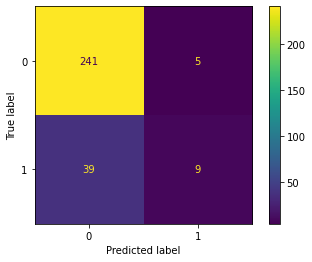

RandomForestClassifier(max_depth=6, min_samples_split=50, random_state=2) 

Accuracy--> 0.8469387755102041
Recall--> 0.08333333333333333
Precision--> 0.8
F1_Score--> 0.1509433962264151


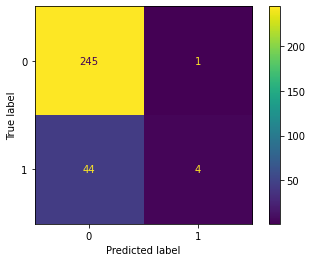

GradientBoostingClassifier(criterion='squared_error', min_samples_split=100) 

Accuracy--> 0.8605442176870748
Recall--> 0.3125
Precision--> 0.6521739130434783
F1_Score--> 0.4225352112676057


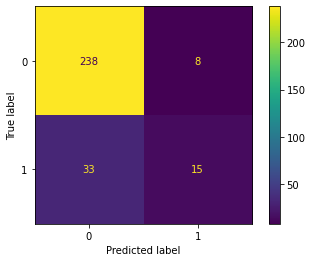

In [942]:
model_eval(dt,X_val,y_val)
model_eval(rf,X_val,y_val)
model_eval(gbm,X_val,y_val)

In [943]:
gbm.feature_importances_

array([0.29451648, 0.12632921, 0.06719346, 0.00913333, 0.03020104,
       0.02608508, 0.01715942, 0.01250925, 0.01054721, 0.        ,
       0.00552218, 0.00426564, 0.        , 0.00100096, 0.05692817,
       0.16978949, 0.02113387, 0.01098807, 0.00877146, 0.01216364,
       0.        , 0.        , 0.0004563 , 0.00438663, 0.00194774,
       0.01592835, 0.00843419, 0.01645927, 0.01266037, 0.03881152,
       0.01667768])

In [944]:
gbm.feature_names_in_

array(['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'BusinessTravel_Travel_Frequently',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Technical Degree', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes',
       'JobInvolvement_2', 'JobInvolvement_3', 'JobInvolvement_4',
       'JobLevel_2', 'JobLevel_4', 'JobLevel_5', 'NumCompaniesWorked_1',
       'NumCompaniesWorked_2', 'NumCompaniesWorked_3',
       'NumCompaniesWorked_5', 'NumCompaniesWorked_6',
       'NumCompaniesWorked_7', 'NumCompaniesWorked_9',
       'StockOptionLevel_1', 'StockOptionLevel_2'], dtype=object)

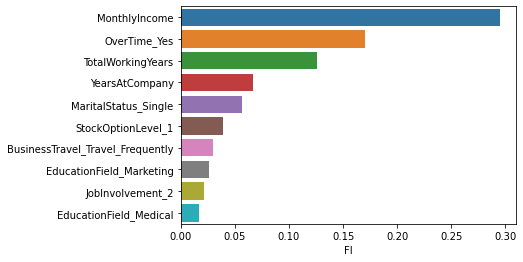

In [945]:
# Feature importance based on best estimator
feature_importance = pd.DataFrame(gbm.feature_importances_, 
                                  index=X_all.columns, columns=['FI']).sort_values('FI',ascending=False)
ax = sns.barplot(x='FI', y=feature_importance[:10].index, data=feature_importance.iloc[:10])

### Probability Decile Analysis

In [1027]:
df['pred_prob']=pd.DataFrame(gbm.predict_proba(X_all)[:,1], index=df.index)
df['Rank_gbm'] = pd.qcut(df['pred_prob'].rank(method='first').values,10,duplicates='drop').codes+1
# .rank used to provide ranking based on value for ease of qcut
# .codes+1 provides numeric codes for ranked groups.
rank_df_actuals = df.groupby('Rank_gbm')['target'].agg(['count','mean'])
rank_df_actuals = pd.DataFrame(rank_df_actuals)
rank_df_actuals.rename(columns={'mean':'Actual_event_rate'}, inplace=True)

# Ranking in descending order
sorted_rank_df = rank_df_actuals.sort_values('Rank_gbm', ascending=False)

# Getting Cummulative values for events
sorted_rank_df['N_events'] = sorted_rank_df['count'] * rank_df_actuals['Actual_event_rate']
sorted_rank_df['cumm_event'] = sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_rate'] = (sorted_rank_df['N_events']/max(sorted_rank_df['cumm_event']))
sorted_rank_df['cumm_event_rate'] = sorted_rank_df['event_rate'].cumsum()

# Getting Cummulative Values for Non-events
sorted_rank_df['N_Non_events'] = sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cumm_Non_events'] = sorted_rank_df['N_Non_events'].cumsum()
sorted_rank_df['Non_event_rate'] = sorted_rank_df['N_Non_events']/max(sorted_rank_df['cumm_Non_events'])
sorted_rank_df['cumm_non_event_rate'] = sorted_rank_df['Non_event_rate'].cumsum()
sorted_rank_df['KS'] = round((sorted_rank_df['cumm_event_rate'] - sorted_rank_df['cumm_non_event_rate']),4)
sorted_rank_df['Decile'] = list(range(1,sorted_rank_df.shape[0]+1))
sorted_rank_df['Lift_overe_Avg'] = sorted_rank_df['Actual_event_rate'] / df.target.mean()
sorted_rank_df


,count,Actual_event_rate,N_events,cumm_event,event_rate,cumm_event_rate,N_Non_events,cumm_Non_events,Non_event_rate,cumm_non_event_rate,KS,Decile,Lift_overe_Avg
Rank_gbm,,,,,,,,,,,,,
10,147,0.823129,121.0,121.0,0.510549,0.510549,26.0,26.0,0.021087,0.021087,0.4895,1,5.105485
9,147,0.340136,50.0,171.0,0.210970,0.721519,97.0,123.0,0.078670,0.099757,0.6218,2,2.109705
8,147,0.183673,27.0,198.0,0.113924,0.835443,120.0,243.0,0.097324,0.197080,0.6384,3,1.139241
7,147,0.068027,10.0,208.0,0.042194,0.877637,137.0,380.0,0.111111,0.308191,0.5694,4,0.421941
6,147,0.040816,6.0,214.0,0.025316,0.902954,141.0,521.0,0.114355,0.422547,0.4804,5,0.253165
5,147,0.081633,12.0,226.0,0.050633,0.953586,135.0,656.0,0.109489,0.532036,0.4216,6,0.506329
4,147,0.034014,5.0,231.0,0.021097,0.974684,142.0,798.0,0.115166,0.647202,0.3275,7,0.210970
3,147,0.013605,2.0,233.0,0.008439,0.983122,145.0,943.0,0.117599,0.764801,0.2183,8,0.084388
2,147,0.006803,1.0,234.0,0.004219,0.987342,146.0,1089.0,0.118410,0.883212,0.1041,9,0.042194


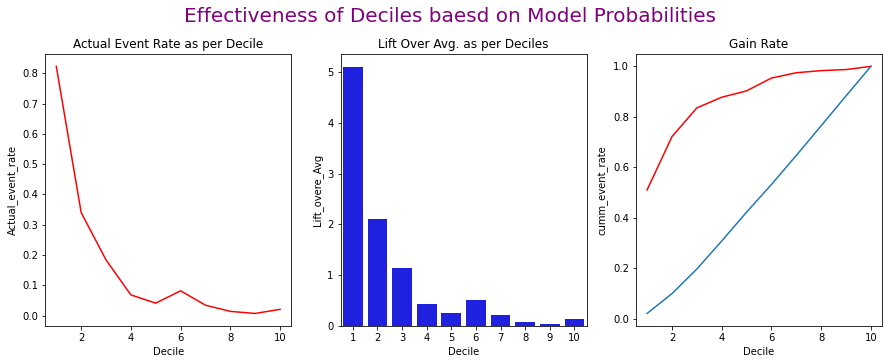

In [1084]:
# Display Effectiveness of Decile based on Model Probabilities
fig, axs = plt.subplots(1,3, figsize=(15,5))
plt.suptitle('Effectiveness of Deciles baesd on Model Probabilities', fontsize=20, color='purple',y=1.01)
sns.lineplot(x ='Decile',y='Actual_event_rate', data=sorted_rank_df, ax=axs[0], color='red')
axs[0].set_title('Actual Event Rate as per Decile', fontsize=12)
sns.barplot(x='Decile', y='Lift_overe_Avg', data=sorted_rank_df,ax=axs[1],color='blue')
axs[1].set_title('Lift Over Avg. as per Deciles', fontsize=12)
sns.lineplot(x='Decile', y='cumm_event_rate', data=sorted_rank_df, color='red',ax=axs[2])
sns.lineplot(x='Decile', y='cumm_non_event_rate', data=sorted_rank_df,ax=axs[2])
axs[2].set_title('Gain Rate', fontsize=12)
plt.show()

In [1085]:
sorted_rank_df

,count,Actual_event_rate,N_events,cumm_event,event_rate,cumm_event_rate,N_Non_events,cumm_Non_events,Non_event_rate,cumm_non_event_rate,KS,Decile,Lift_overe_Avg
Rank_gbm,,,,,,,,,,,,,
10,147,0.823129,121.0,121.0,0.510549,0.510549,26.0,26.0,0.021087,0.021087,0.4895,1,5.105485
9,147,0.340136,50.0,171.0,0.210970,0.721519,97.0,123.0,0.078670,0.099757,0.6218,2,2.109705
8,147,0.183673,27.0,198.0,0.113924,0.835443,120.0,243.0,0.097324,0.197080,0.6384,3,1.139241
7,147,0.068027,10.0,208.0,0.042194,0.877637,137.0,380.0,0.111111,0.308191,0.5694,4,0.421941
6,147,0.040816,6.0,214.0,0.025316,0.902954,141.0,521.0,0.114355,0.422547,0.4804,5,0.253165
5,147,0.081633,12.0,226.0,0.050633,0.953586,135.0,656.0,0.109489,0.532036,0.4216,6,0.506329
4,147,0.034014,5.0,231.0,0.021097,0.974684,142.0,798.0,0.115166,0.647202,0.3275,7,0.210970
3,147,0.013605,2.0,233.0,0.008439,0.983122,145.0,943.0,0.117599,0.764801,0.2183,8,0.084388
2,147,0.006803,1.0,234.0,0.004219,0.987342,146.0,1089.0,0.118410,0.883212,0.1041,9,0.042194


In [1086]:
# audience
# Around 80% attrition events are in 3 Ranks, so will group them in Bottom & Top groups
df['Ranking_group']=np.where(df['Rank_gbm']<8,'Bottom7','Top3')

In [1096]:
ranking_group_df = df.groupby('Ranking_group')['target'].agg(['mean', 'count', 'sum'])
ranking_group_df['event_rate'] = ranking_group_df['sum']/ranking_group_df['sum'].sum()
ranking_group_df

,mean,count,sum,event_rate
Ranking_group,,,,
Bottom7,0.037901,1029,39,0.164557
Top3,0.448980,441,198,0.835443


- Top3 ranked group have 441 employee out of which 198 attrited, which is 83.5% of total attriters

In [1102]:
# Focussing on Top3 ranked employees only
df_top3 = df[df['Ranking_group']=='Top3']
df_top3.Ranking_group.value_counts()

Top3    441
Name: Ranking_group, dtype: int64

In [1106]:
df_top3.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,target,y_pred_P,P_Rank_gbm,pred_prob,Rank_gbm,Ranking_group
Emp.ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1,0.054793,4,0.256759,9,Top3
4,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1,0.058847,4,0.891538,10,Top3
5,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0,0.186420,8,0.335839,9,Top3
8,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6,0,0.130478,7,0.186420,8,Top3
10,59,Travel_Rarely,1324,Research & Development,3,3,Medical,1,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0,0,0.033410,2,0.274127,9,Top3


In [1105]:
# Based on Feature importance from Model
feature_importance[:3]

,FI
MonthlyIncome,0.294516
OverTime_Yes,0.169789
TotalWorkingYears,0.126329


In [1108]:
# 1. Monthly income
df_top3['Income_rank'] = pd.qcut(df_top3['MonthlyIncome'].rank(method='first').values,10,duplicates='drop').codes+1

In [1117]:
df_top3.groupby('Income_rank')['MonthlyIncome'].agg(['min','mean','max'])

,min,mean,max
Income_group,,,
1,1009,1586.088889,2058
2,2061,2220.363636,2335
3,2340,2424.750000,2559
4,2561,2690.795455,2814
5,2827,3102.113636,3485
6,3500,4086.863636,4538
7,4554,5025.681818,5485
8,5487,6274.250000,7143
9,7314,8834.272727,9998


In [1119]:
mean_income = df_top3.MonthlyIncome.mean()

In [1122]:
df_top3['Income_group'] = np.where(df_top3['MonthlyIncome']>mean_income,'High_income','Low_income')
df_top3.groupby('Income_group')['target'].agg(['count','mean','sum'])

,count,mean,sum
Income_group,,,
High_income,159,0.389937,62
Low_income,282,0.482270,136


- Employee with Low income group are most proned to Attrite

In [1128]:
# 2. OverTime_Yes
df_top3.groupby('OverTime')['target'].agg(['count','mean','sum'])

,count,mean,sum
OverTime,,,
No,197,0.390863,77
Yes,244,0.495902,121


- 50% employee who were doing Overtime Attrited

In [1130]:
# 3. TotalWorkingYears
df_top3['wrk_exp_rank'] = pd.qcut(df_top3['TotalWorkingYears'].rank(method='first').values,10,duplicates='drop').codes+1
df_top3.groupby('wrk_exp_rank')['TotalWorkingYears'].agg(['min','mean','max'])

,min,mean,max
wrk_exp_rank,,,
1,0,0.755556,1
2,1,1.045455,2
3,2,2.931818,4
4,4,5.068182,6
5,6,6.477273,7
6,7,7.954545,9
7,9,9.522727,10
8,10,10.386364,12
9,12,15.500000,18


In [1131]:
mean_wrk_exp  =df_top3.TotalWorkingYears.mean()

In [1133]:
df_top3['exp_group'] = np.where(df_top3['TotalWorkingYears']>mean_wrk_exp,'High_exp','Low_exp')
df_top3.groupby('exp_group')['target'].agg(['count','mean','sum'])

,count,mean,sum
exp_group,,,
High_exp,182,0.373626,68
Low_exp,259,0.501931,130


- 50% employees with Low Exp attrited

In [1136]:
# check with Crosstabs
pd.crosstab(index=df_top3['exp_group'], columns=df_top3['Income_group'],values=df_top3['TotalWorkingYears'],aggfunc=('count'))

Income_group,High_income,Low_income
exp_group,,
High_exp,128,54
Low_exp,31,228


In [1141]:
pd.crosstab(index=df_top3['exp_group'], columns=df_top3['Income_group'], values=df_top3['target'], aggfunc='mean')

Income_group,High_income,Low_income
exp_group,,
High_exp,0.351562,0.425926
Low_exp,0.548387,0.495614


- around 50% employee having low_exp & High_income, low_exp & Low_income have attrited
- Majorly employee with Low exp. are most proned to attrite.

In [1143]:
pd.crosstab(index=df_top3['OverTime'],columns=df_top3['Income_group'], values=df_top3['target'], aggfunc='mean')

Income_group,High_income,Low_income
OverTime,,
No,0.384615,0.393939
Yes,0.393617,0.560000


- Employee wit Low_income and doing Overtime are most Proned to Attrite

### Conclusion

 - Employees with Low Experience, low Income & working Overtime are most Proned to Attrite